In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import subprocess

In [3]:
def get_data(phi, w, par, L, dx, type):
    cmd = 'c:/users/coolg/modeling/wk7/m.exe'+' '+str(phi)+' '+str(w)+' '+str(par)+' '+str(L)+' '+str(dx)+' '+type+' write'
    returned_output = subprocess.check_output(cmd)
    #print(returned_output.decode('utf-8'))
    return pd.DataFrame(np.fromfile('modeled_data.binary', dtype=np.dtype([
                ('phi', np.float64), 
                ('w', np.float64), 
                ('par', np.float64)
            ])))

# Приближение малыми колебаниями

Для определения границы применимости приближения малых колебаний рассмотрю функцию ошибки
\begin{equation}
\text{ERR}(\phi(0), t) = \dfrac{\phi^{\text{exp}}(t) - \phi^{\text{teor}}(t)}{\phi(0)}.
\end{equation}
Взяв границу точности как 5%, определю время, когда $\text{ERR}(\phi(0), t_0) = 0.05$.  
Проделаю эту процедуру для разных значений начальных параметров. В расчетах был использован метод Ренге-Кутте 4 в целях минимизации ошибки вычислений. Благодаря этому можно считать, что вся ошибка (1) вызвана неточностью теоретической модели.

In [67]:
def draw_data(data, ax, x0, L):
    t = np.linspace(0, L, len(data.phi))

    #ax.set_title('$\phi(t)$', fontsize=28)
    ax.plot(t, data.phi / x0 - np.cos(t), label=f'amplitude {round(x0/np.pi,2)} $\pi$')
    #ax.plot(t, x0 * np.cos(t), label='harmonic oscillator')

    ax.grid(True)

    ax.set_ylabel('ERR', fontsize=20)
    ax.set_xlabel('t', fontsize=20)

    ax.legend(loc='best', fontsize=18)
    #plt.show()

## Пример функции ERR

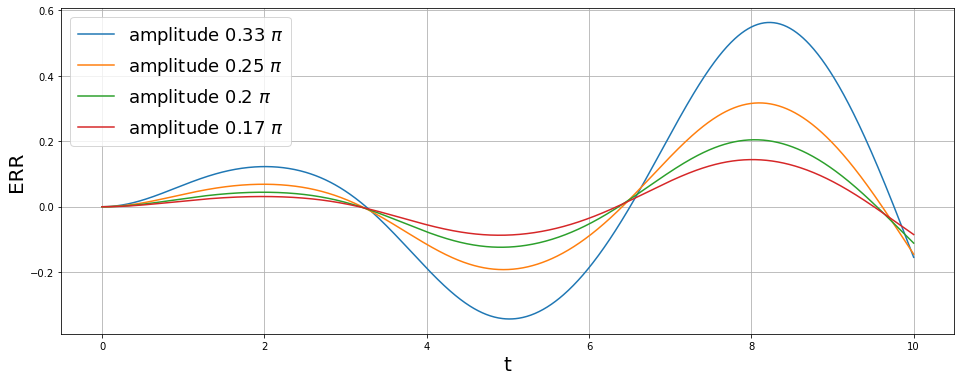

In [68]:
fig, ax = plt.subplots()
fig.set_size_inches(16,6)

d1 = get_data(phi = np.pi / 4, w = 0, par = 1, L = 10, dx = 0.01, type='heun')
d2 = get_data(phi = np.pi / 5, w = 0, par = 1, L = 10, dx = 0.01, type='heun')
d3 = get_data(phi = np.pi / 6, w = 0, par = 1, L = 10, dx = 0.01, type='heun')
d4 = get_data(phi = np.pi / 3, w = 0, par = 1, L = 10, dx = 0.01, type='heun')

draw_data(d4, ax, np.pi/3, 10)
draw_data(d1, ax, np.pi/4, 10)
draw_data(d2, ax, np.pi/5, 10)
draw_data(d3, ax, np.pi/6, 10)
#draw_data(d_r, ax[1], np.pi/4, 25)
#ax[0].set_ylim(-10,10)
#ax[1].set_ylim(-10,10)
plt.show()

## Общий рассчет

In [69]:
def find_max(data, x0, L, dx):
    t = np.linspace(0, L, int(L/dx))
    d_ = data.phi / x0 - np.cos(t)
    d_ = d_[lambda f: d_ >= 0.05]
    if len(d_) == 0:
        print(f'for {x0} size == 0')
        return 0
    return d_.keys()[0] * dx

In [70]:
res = []
angle = np.linspace(np.pi/180, np.pi/6, 100)
w = 0
par = 1
L = 2500
dx = 0.01
for x0 in angle:
    res.append(find_max(get_data(x0, w, par, L, dx, 'rk'), x0, L, dx))

In [71]:
res

[2175.51,
 1396.43,
 969.1,
 705.22,
 535.57,
 422.43,
 340.73,
 277.94,
 233.91,
 196.29,
 171.05,
 146.04,
 133.25,
 114.51,
 101.94,
 95.49,
 83.04,
 76.69,
 70.38,
 64.1,
 57.86,
 51.71,
 51.45,
 45.31,
 45.13,
 39.04,
 38.86,
 33.0,
 32.68,
 32.55,
 32.45,
 26.490000000000002,
 26.34,
 26.23,
 26.150000000000002,
 26.080000000000002,
 20.21,
 20.07,
 19.97,
 19.900000000000002,
 19.830000000000002,
 19.78,
 19.73,
 19.69,
 13.93,
 13.81,
 13.73,
 13.66,
 13.6,
 13.55,
 13.51,
 13.47,
 13.43,
 13.4,
 13.36,
 13.34,
 13.31,
 13.290000000000001,
 13.26,
 7.8500000000000005,
 7.69,
 7.6000000000000005,
 7.53,
 7.47,
 7.42,
 7.37,
 7.33,
 7.3,
 7.26,
 7.23,
 7.2,
 7.17,
 7.15,
 7.13,
 7.1000000000000005,
 7.08,
 7.0600000000000005,
 7.04,
 7.03,
 7.01,
 6.99,
 6.98,
 6.96,
 6.95,
 6.93,
 6.92,
 6.91,
 6.9,
 6.890000000000001,
 6.87,
 6.86,
 6.8500000000000005,
 6.84,
 6.83,
 6.83,
 6.82,
 6.8100000000000005,
 6.8,
 6.79,
 6.78]

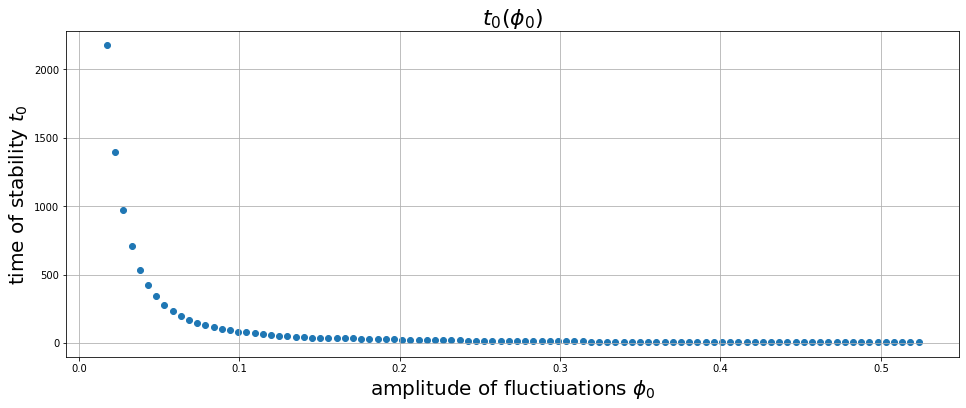

In [72]:
fig, ax = plt.subplots()
fig.set_size_inches(16,6)

ax.scatter(angle, res)

ax.set_title('$t_0(\phi_0)$', fontsize=22)

ax.set_xlabel('amplitude of fluctiuations $\phi_0$', fontsize=20)
ax.set_ylabel('time of stability $t_0$', fontsize=20)

ax.grid(True)
plt.show()